In [2]:
#pip install openai==0.28
#pip install pyvis

In [3]:
import os
import networkx as nx
import openai
from pyvis.network import Network
import matplotlib.pyplot as plt


In [8]:
os.environ['OPENAI_API_KEY'] = ''
openai.api_key = os.getenv('OPENAI_API_KEY')

In [60]:
def get_chat_gpt(query):
    response = openai.ChatCompletion.create(
        messages=[
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return response.choices[0].message.content
    
def get_influencers_and_influencees(artist_name):
    # influencers_query = f"Please provide a list of the full names without special characters of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    #influencees_query = f"Please provide a list of the full names without special characters of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    influencers_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who influenced {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    """
    influencees_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who are influenced by {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    """    

    
    influencers = get_chat_gpt(influencers_query)
    influencees = get_chat_gpt(influencees_query)
    return influencers, influencees

In [64]:
get_influencers_and_influencees('Immanuel Kant')

('Jean-Jacques Rousseau, David Hume, Christian Wolff, Alexander Gottlieb Baumgarten, Moses Mendelssohn',
 'Johann Wolfgang von Goethe, Friedrich Nietzsche, Martin Heidegger, Hannah Arendt, Arthur Schopenhauer')

In [62]:
get_influencers_and_influencees('Immanuel Kant')

('David Hume, Jean-Jacques Rousseau, Christian Wolff, Francis Bacon, Isaac Newton',
 'Ludwig Wittgenstein, Hannah Arendt, Georg Wilhelm Friedrich Hegel, Friedrich Nietzsche, Saul Kripke')

In [53]:
artists = ["Claude Monet", "Vincent van Gogh", "Pablo Picasso", "Salvador Dalí", "Georgia O'Keeffe"]
artists = ["Sigmund Freud"]

# Collect data for each artist
artist_influence_data = {}
for artist in artists:
    influencers, influencees = get_influencers_and_influencees(artist)
    artist_influence_data[artist] = {
        "influencers": influencers,
        "influencees": influencees
    }

In [54]:
artist_influence_data

{'Sigmund Freud': {'influencers': 'Gustav Fechner, Hermann von Helmholtz, Gustav Theodor Fechner, Friedrich Nietzsche, Josef Breuer',
  'influencees': 'Salvador Dali, Jacques Lacan, Carl Jung, Jean-Paul Sartre, Melanie Klein'}}

In [55]:
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"].split(','):
            influencer = influencer.strip()
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"].split(','):
            influencee = influencee.strip()
            if influencee:
                G.add_edge(artist, influencee)
    return G

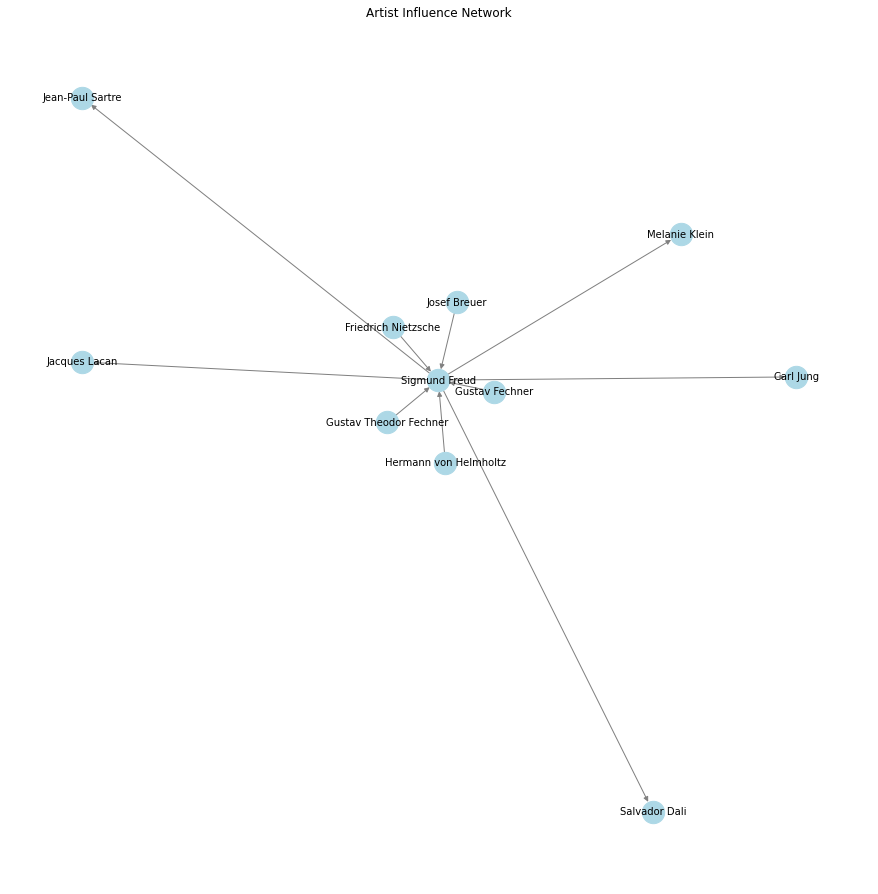

In [56]:
G = create_a_directed_graph(artist_influence_data)
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color='lightblue', edge_color='gray')
plt.title("Artist Influence Network")
plt.show()

In [35]:
#Now: do 3 loops 

In [65]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}

for i in range(3):
    new_artists = set()
    for artist in artists_to_process:
        influencers, influencees = get_influencers_and_influencees(artist)
        for influencer in influencers.split(","):
            new_artists.add(influencer.strip()) 
        for influencee in influencees.split(","):
            new_artists.add(influencee.strip()) 
        artist_influence_data[artist] = {
            "influencers": influencers,
            "influencees": influencees
        }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

In [66]:
G = create_a_directed_graph(artist_influence_data)

In [67]:
# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True

# Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

directed_graph.html
